In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
# install the libraries if not yet
!pip install --upgrade pip
!pip install networkx

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [0]:
import random
import string
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

def generate_random_dataset(num_customers, num_products, num_transactions):
    """Generate a random dataset containing customer, product, and transaction information."""
    customers = [f'CUST{str(i).zfill(4)}' for i in range(1, num_customers+1)]
    
    # Modified to generate exponential distribution for product IDs
    scale = 1.0
    products = np.random.exponential(scale, num_products)
    products = [f'PROD{str(int(product)).zfill(4)}' for product in products]
    
    transactions = []
    for i in range(num_transactions):
        transaction_id = f'TRAN{str(i).zfill(6)}'
        customer_id = random.choice(customers)
        product_id = random.choice(products)
        transaction_date = datetime.now() - timedelta(days=random.randint(0, 365))
        transaction_amount = round(random.uniform(10.0, 1000.0), 2)
        transactions.append({
            'transaction_id': transaction_id,
            'customer_id': customer_id,
            'product_id': product_id,
            'transaction_date': transaction_date,
            'transaction_amount': transaction_amount
        })
    return transactions

In [0]:
transactions = generate_random_dataset(100, 50, 1000)
df = pd.DataFrame(transactions)
df.head()

,transaction_id,customer_id,product_id,transaction_date,transaction_amount
0,TRAN000000,CUST0098,PROD0001,2022-11-22 05:12:09.623638,375.79
1,TRAN000001,CUST0025,PROD0001,2022-06-08 05:12:09.623671,839.82
2,TRAN000002,CUST0059,PROD0001,2023-01-20 05:12:09.623679,537.55
3,TRAN000003,CUST0080,PROD0001,2023-03-01 05:12:09.623686,334.48
4,TRAN000004,CUST0018,PROD0001,2022-10-13 05:12:09.623692,909.91


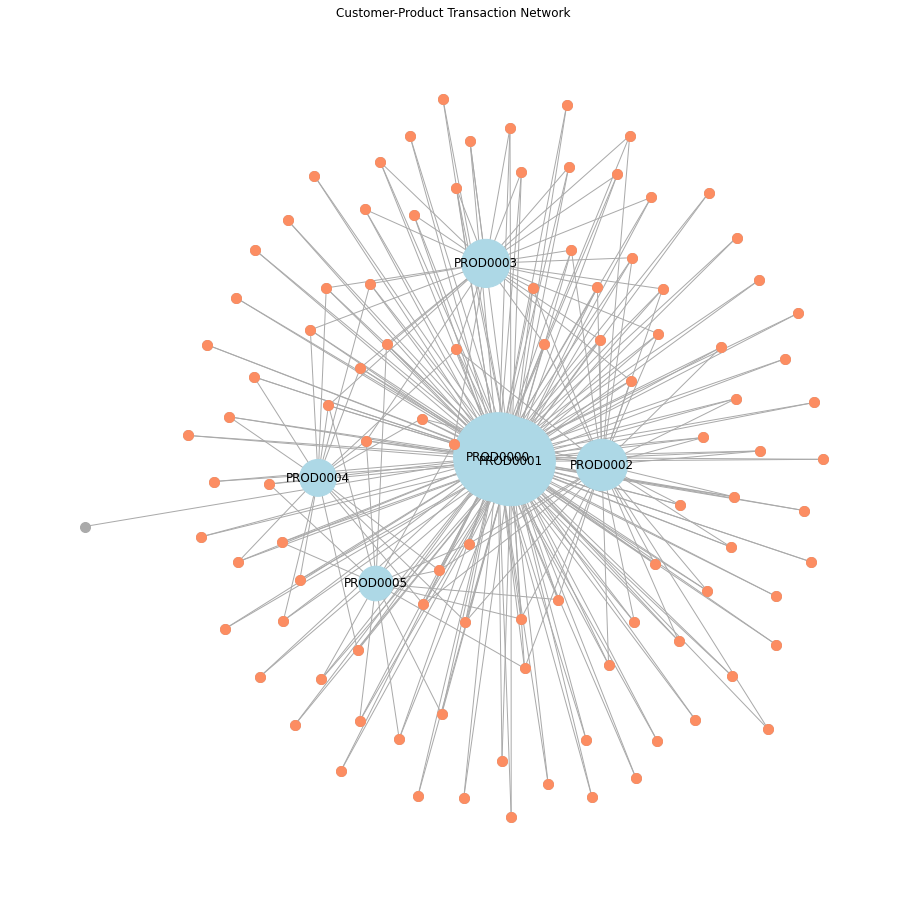

In [0]:
plt.figure(figsize=(16, 16))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='customer_id', target='product_id') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df.product_id.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df.product_id.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df.customer_id.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df.customer_id.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Customer-Product Transaction Network")

# 5. Tell matplotlib to show it
plt.show()

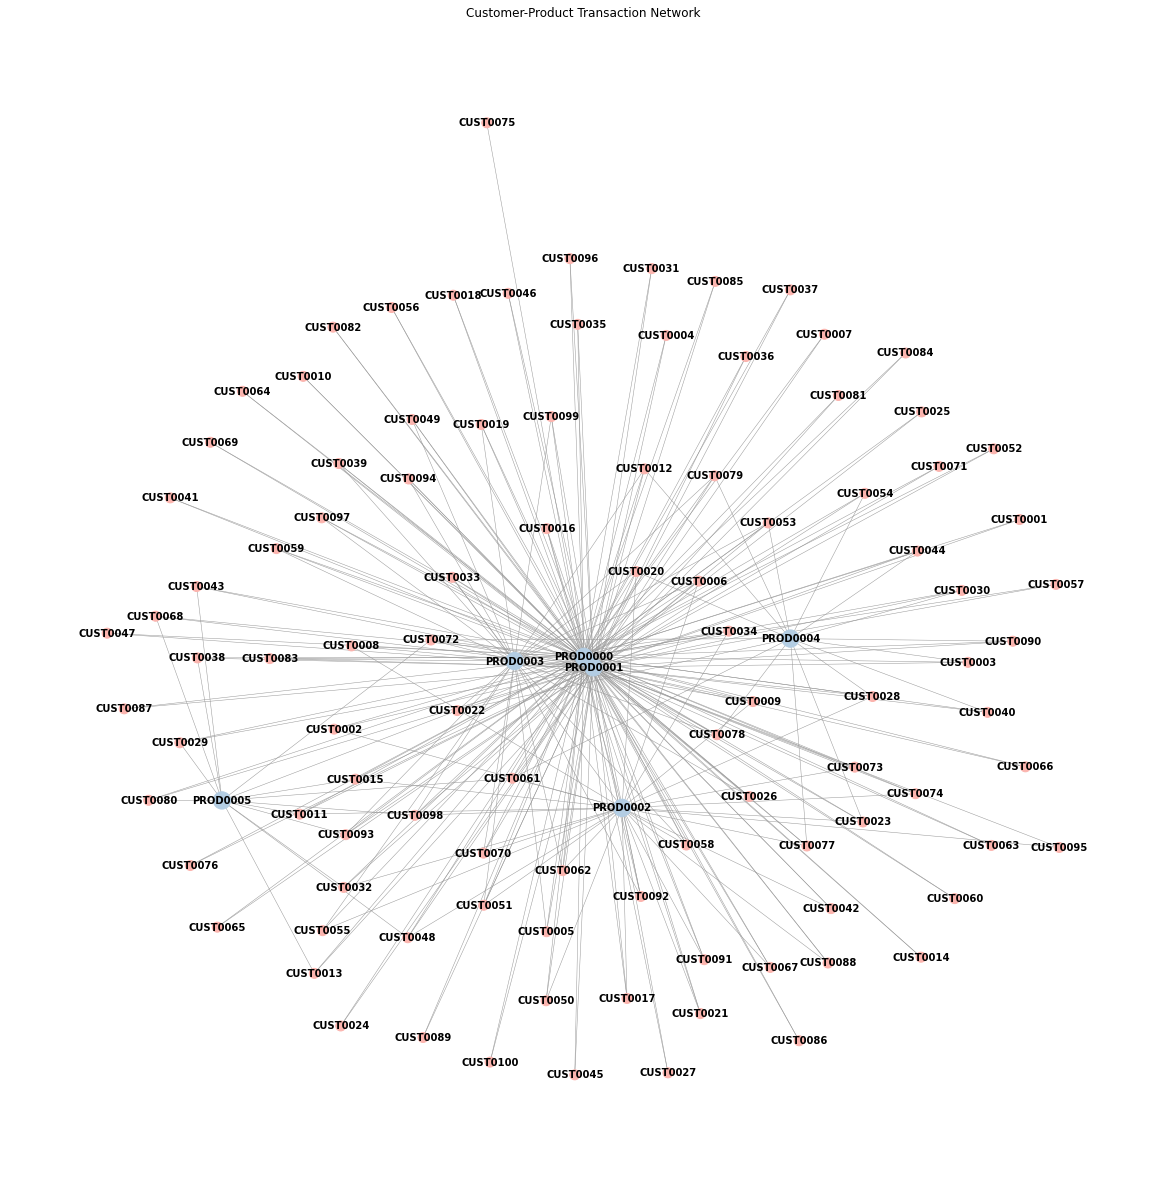

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
# create an empty graph
G = nx.Graph()

# add nodes to the graph
customers = df.customer_id.unique()
products = df.product_id.unique()

for customer in customers:
    G.add_node(customer, node_type='customer')

for product in products:
    G.add_node(product, node_type='product')

# add edges to the graph
for i, row in df.iterrows():
    G.add_edge(row['customer_id'], row['product_id'], transaction_id=row['transaction_id'], 
               transaction_amount=row['transaction_amount'], transaction_date=row['transaction_date'])

# define node colors and sizes based on their type
node_colors = {'customer': '#fbb4ae', 'product': '#b3cde3'}
node_sizes = {'customer': 100, 'product': 300}

# draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=[node_colors[G.nodes[n]['node_type']] for n in G.nodes()], 
        node_size=[node_sizes[G.nodes[n]['node_type']] for n in G.nodes()],
        with_labels=True, font_size=10, font_weight='bold', width=0.5, edge_color='#999999')

plt.title('Customer-Product Transaction Network')
plt.axis('off')
plt.show()

In [0]:
import plotly.graph_objs as go
import networkx as nx
import pandas as pd

# Load data
#df = pd.read_csv('customer_product.csv')

# Create a graph from the dataset
g = nx.from_pandas_edgelist(df, source='customer_id', target='product_id')

# Create a layout for the graph
pos = nx.spring_layout(g)

# Define node colors and sizes
node_colors = ['blue' if node in df['customer_id'].values else 'orange' for node in g.nodes()]
node_sizes = [15 if node in df['customer_id'].values else 50 for node in g.nodes()]

# Define the edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add the edge coordinates to the trace
for edge in g.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Define the node traces
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_colors,
        size=node_sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Add the node coordinates and text to the trace
for node in g.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    if node in df['customer_id'].values:
        node_trace['text'] += tuple([f"Customer {node}"])
    else:
        node_trace['text'] += tuple([f"Product {node}"])

# Define the figure layout
fig_layout = go.Layout(
    title='Customer-Product Network Graph',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=800,
    height=800)

# Create the figure object
fig = go.Figure(data=[edge_trace, node_trace], layout=fig_layout)

# Show the figure
fig.show()

In [0]:
import plotly.io as pio

# Set the figure size
fig.update_layout(width=900, height=900)

# Save the figure as an HTML file
pio.write_html(fig, file='network_graph.html', auto_open=True)